In [269]:
#import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import os
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.image as mpimg
from  matplotlib import pyplot
import cv2
import random
from PIL import Image
from sklearn.utils import class_weight
import numpy
import codecs

In [270]:
!pip install xmltodict

distributed 1.21.8 requires msgpack, which is not installed.
keras-preprocessing 1.0.1 has requirement keras>=2.1.6, but you'll have keras 2.1.3 which is incompatible.
keras-applications 1.0.2 has requirement keras>=2.1.6, but you'll have keras 2.1.3 which is incompatible.
fastai 0.7.0 has requirement torch<0.4, but you'll have torch 0.4.1.post2 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [271]:
import xmltodict, json
anno = os.listdir('ruler_rotated_lobster_uk/')
import imgaug as ia
from imgaug import augmenters as iaa
import math

In [272]:
def rotate_and_translate_points(cx,cy,angle,width,height,w,d):    
    points = []
    
    #print(cx,cy,rectange_points,angle,width,height)
    
    if angle>(3.14159265358979323846/2):
        angle = angle - 3.14159265358979323846
    rectangle_points = [(w/2.0,d/2.0),(w/2.0,-d/2.0),(-w/2.0,-d/2.0),(-w/2.0,d/2.0)]
    for xr,yr in rectangle_points:
        xtemp = math.cos(angle)*xr + math.sin(angle)*yr
        yr = math.sin(angle)*xr - math.cos(angle)*yr
        xr = xtemp
    
        xr = xr + cx
        yr = yr + cy
        
        #print(xr,yr,width,height)
        if (xr/width)*224 >225 or (yr/height)*224 >225:
            print("has too be")
            print("greater",(xr/width)*224)
            print("greater",(yr/height)*224)
        #points.append(((xr/width)*224,(yr/height)*224))
        points.append((xr,yr))
    return points

In [273]:
def process_image_keypoints(img,rectangle_points):
    desired_size = 448

    old_size = img.shape

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(img, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)

    point_list = rectangle_points
    rects = []
    for a,b in point_list:
        a = a*ratio
        b = b*ratio
        rects.append([a+left,b+top])
    return new_im,rects

In [274]:
count_correct = 0
count_wrong = 0
labels =  []
images = []
bb = []
bboxes = []
image_sizes = []
image_names = []
bb_sizes = []
bboxes_rot =  []
for file in anno:
    #try:
    if(file.split(".")[-1]=='xml'):
        try:
            with open("ruler_rotated_lobster_uk/"+file,'r') as f:
                
                print('ruler_rotated_lobster_uk/'+file)
                with open('ruler_rotated_lobster_uk/'+file,'r') as f:
                    text = f.read()
                    d = xmltodict.parse(text)
                
                path = "lobster_uk/" + file.split(".")[0] + ".JPG"
                bgr_img = cv2.imread(path)
                img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
                obj = d['annotation']['object'][0] if isinstance(d['annotation']['object'],list) else d['annotation']['object']
                bbox = obj['robndbox']
                
                cx,cy,w,h,angle = float(bbox['cx']),float(bbox['cy']),float(bbox['w']),float(bbox['h']),float(bbox['angle'])
                
                width,height = float(d['annotation']['size']['width']),float(d['annotation']['size']['height'])
                rectange_points = rotate_and_translate_points(cx,cy,angle,width,height,w,h)
                
                img,rectange_points = process_image_keypoints(img,rectange_points)
                
                
                keypoints = []
                for x,y in rectange_points:
                        keypoints.append(ia.Keypoint(x=x, y=y))
                bboxes.append(ia.KeypointsOnImage(keypoints, shape=img.shape))                
                
                images.append(img)
                image_names.append(file.split(".")[0] + ".JPG")
                bb_sizes.append((w,h))
                bboxes_rot.append([w,h,cx,cy,angle])
                image_sizes.append((float(d['annotation']['size']['width']),float(d['annotation']['size']['height'])))
                count_correct += 1
        except Exception as ex:
           print(ex)
           count_wrong += 1

ruler_rotated_lobster_uk/PC190076.xml
ruler_rotated_lobster_uk/PC190134.xml
ruler_rotated_lobster_uk/PC190312.xml
ruler_rotated_lobster_uk/P8080076.xml
ruler_rotated_lobster_uk/PC190114.xml
ruler_rotated_lobster_uk/PC190072.xml
ruler_rotated_lobster_uk/P8080103.xml
ruler_rotated_lobster_uk/PC190111.xml
ruler_rotated_lobster_uk/PC190303.xml
ruler_rotated_lobster_uk/P8220193.xml
ruler_rotated_lobster_uk/PC190238.xml
ruler_rotated_lobster_uk/P8220231.xml
ruler_rotated_lobster_uk/P8080128.xml
ruler_rotated_lobster_uk/P8080124.xml
ruler_rotated_lobster_uk/PC190203.xml
ruler_rotated_lobster_uk/P8220177.xml
ruler_rotated_lobster_uk/P8080098.xml
ruler_rotated_lobster_uk/PC190212.xml
ruler_rotated_lobster_uk/P8220228.xml
ruler_rotated_lobster_uk/P8080045.xml
ruler_rotated_lobster_uk/PC190208.xml
ruler_rotated_lobster_uk/PC190092.xml
ruler_rotated_lobster_uk/P8080132.xml
ruler_rotated_lobster_uk/PC190207.xml
ruler_rotated_lobster_uk/P8080101.xml
ruler_rotated_lobster_uk/P8080039.xml
ruler_rotate

ruler_rotated_lobster_uk/PC190141.xml
ruler_rotated_lobster_uk/P8080062.xml
ruler_rotated_lobster_uk/P8080029.xml
ruler_rotated_lobster_uk/P8080158.xml
ruler_rotated_lobster_uk/PC190097.xml
ruler_rotated_lobster_uk/PC190304.xml
ruler_rotated_lobster_uk/PC190257.xml
ruler_rotated_lobster_uk/P8080066.xml
ruler_rotated_lobster_uk/PC190115.xml
ruler_rotated_lobster_uk/PC190224.xml
ruler_rotated_lobster_uk/P8220180.xml
ruler_rotated_lobster_uk/P8080065.xml
ruler_rotated_lobster_uk/PC190077.xml
ruler_rotated_lobster_uk/P8220215.xml
ruler_rotated_lobster_uk/P8080071.xml
ruler_rotated_lobster_uk/P8080043.xml
ruler_rotated_lobster_uk/P8080093.xml
ruler_rotated_lobster_uk/PC190258.xml
ruler_rotated_lobster_uk/P8080020.xml
ruler_rotated_lobster_uk/P8080126.xml
ruler_rotated_lobster_uk/PC190140.xml
ruler_rotated_lobster_uk/P8080009.xml
ruler_rotated_lobster_uk/PC190081.xml
ruler_rotated_lobster_uk/PC190206.xml
ruler_rotated_lobster_uk/P8080116.xml
ruler_rotated_lobster_uk/PC190241.xml
ruler_rotate

In [275]:
sometimes = lambda aug: iaa.Sometimes(0.5, aug)
seq = iaa.Sequential(
    [
        # apply the following augmenters to most images
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.5), # vertically flip 50% of all images
        # crop images by -5% to 10% of their height/width
        #sometimes(iaa.CropAndPad(
        #    percent=(-0.05, 0.1),
        #    pad_mode=ia.ALL,
        #    pad_cval=(0, 255)
        #)),
        sometimes(iaa.Affine(
            #scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
            translate_percent={"x": (-0.05, 0.05), "y": (-0.05, 0.5)}, # translate by -20 to +20 percent (per axis)
            rotate=(-10, 10), # rotate by -45 to +45 degrees
            #shear=(-, 16), # shear by -16 to +16 degrees
            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
            cval=(0, 255), # if mode is constant, use a cval between 0 and 255
            mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        )),
        # execute 0 to 5 of the following (less important) augmenters per image
        # don't execute all of them, as that would often be way too strong
        iaa.SomeOf((0, 5),
            [
                #sometimes(iaa.Superpixels(p_replace=(0, 1.0), n_segments=(20, 200))), # convert images into their superpixel representation
                #iaa.OneOf([
                #    iaa.GaussianBlur((0, 3.0)), # blur images with a sigma between 0 and 3.0
                #    iaa.AverageBlur(k=(2, 7)), # blur image using local means with kernel sizes between 2 and 7
                #    iaa.MedianBlur(k=(3, 11)), # blur image using local medians with kernel sizes between 2 and 7
                #]),
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
                #iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)), # emboss images
                # search either for all edges or for directed edges,
                # blend the result with the original image using a blobby mask
                #iaa.SimplexNoiseAlpha(iaa.OneOf([
                #    iaa.EdgeDetect(alpha=(0.5, 1.0)),
                #    iaa.DirectedEdgeDetect(alpha=(0.5, 1.0), direction=(0.0, 1.0)),
                #])),
                #iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5), # add gaussian noise to images
                #iaa.OneOf([
                #    iaa.Dropout((0.01, 0.1), per_channel=0.5), # randomly remove up to 10% of the pixels
                #    iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
                #]),
                #iaa.Invert(0.05, per_channel=True), # invert color channels
                iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                #iaa.AddToHueAndSaturation((-10, 20)), # change hue and saturation
                # either change the brightness of the whole image (sometimes
                # per channel) or change the brightness of subareas
                iaa.OneOf([
                    #iaa.Multiply((0.5, 1.5), per_channel=0.5),
                    #iaa.FrequencyNoiseAlpha(
                    #    exponent=(-4, 0),
                    #    first=iaa.Multiply((0.5, 1.5), per_channel=True),
                    #    second=iaa.ContrastNormalization((0.5, 2.0))
                    #)
                ]),
                iaa.ContrastNormalization((0.9, 1.10), per_channel=0.5), # improve or worsen the contrast
                #iaa.Grayscale(alpha=(0.0, 1.0)),
                #sometimes(iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)), # move pixels locally around (with random strengths)
                #sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05))), # sometimes move parts of the image around
                #sometimes(iaa.PerspectiveTransform(scale=(0.01, 0.1)))
            ],
            random_order=True
        )
    ],
    random_order=True
)

In [276]:
# bboxes = list(np.array(bboxes)[indexes])
# labels =  list(np.array(labels)[indexes])
# images = list(np.array(images)[indexes])
# image_sizes = list(np.array(image_sizes)[indexes])

In [277]:
# import seaborn as sns
# import numpy as np
# from scipy.stats import itemfreq
# itemfreq(labels)

In [278]:
# num_labels = len(np.unique(list(labels)))
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(list(labels))
# le_labels = le.transform(labels)
# one = preprocessing.OneHotEncoder()
# one.fit(list(le_labels.reshape(-1,1)))
# one_labels = one.transform(le_labels.reshape(-1,1))
# numpy.save('classes.npy', le.classes_)

In [279]:
def augment_images(images,bboxes,image_sizes,times):
    all_bboxes = []
    all_images = list(images)
    all_image_sizes = list(image_sizes)

    for bbs in bboxes:
            outputs = []
            for obj in bbs.keypoints:
                outputs.append(obj.x)
                outputs.append(obj.y)
            all_bboxes.append(np.array(outputs))
    for i in range(times):
        seq_det = seq.to_deterministic()
        image_aug = seq_det.augment_images(images)
        bbs_aug = seq_det.augment_keypoints(bboxes)
        for bbs in bbs_aug:
            outputs = []
            for obj in bbs.keypoints:
                outputs.append(obj.x)
                outputs.append(obj.y)
            all_bboxes.append(np.array(outputs))
        all_images = all_images + list(image_aug)
        all_image_sizes = all_image_sizes + list(image_sizes)
    return all_images,all_bboxes,all_image_sizes

In [280]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=False,random_state=100)
test_cvscores = []
validation_cvscores = []
fusion_model_info = []
kfold_data = []

i = 0
for train, test in kf.split(images):
    i = i + 1
    print(i)
    all_images,all_bboxes,all_image_sizes = augment_images(np.array(images)[train],np.array(bboxes)[train],np.array(image_sizes)[train],2)
    test_bboxes = []
    
    for bbs in list(np.array(bboxes)[test]):
            outputs = []
            
            for obj in bbs.keypoints:
                outputs.append(obj.x)
                outputs.append(obj.y)
            test_bboxes.append(np.array(outputs))
    kfold_data.append([all_images,all_bboxes,all_image_sizes,np.array(images)[test],test_bboxes,np.array(image_sizes)[test],np.array(image_names)[test]])

1
2
3
4
5


In [281]:
with open('ruler-detection-rotated-lobsteruk0.pckl','wb') as file:
    pickle.dump(kfold_data[0],file)
with open('ruler-detection-rotated-lobsteruk1.pckl','wb') as file:
    pickle.dump(kfold_data[1],file)
with open('ruler-detection-rotated-lobsteruk2.pckl','wb') as file:
    pickle.dump(kfold_data[2],file)
with open('ruler-detection-rotated-lobsteruk3.pckl','wb') as file:
    pickle.dump(kfold_data[3],file)
with open('ruler-detection-rotated-lobsteruk4.pckl','wb') as file:
    pickle.dump(kfold_data[4],file)

In [282]:
%matplotlib inline

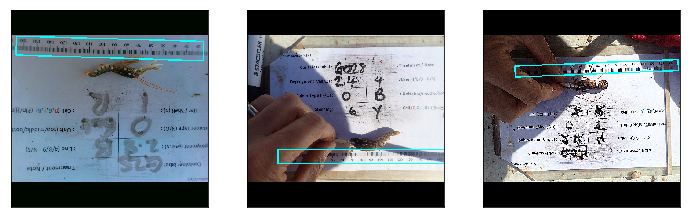

In [283]:
fig, ax = plt.subplots(figsize=(12,15))



plt.subplot(1, 3, 1)
idx = 700
point_list = []
#for keypoint in all_bboxes[idx].keypoints:
#    point_list.append([keypoint.x,keypoint.y])

point_list = [[all_bboxes[idx][0],all_bboxes[idx][1]],[all_bboxes[idx][2],all_bboxes[idx][3]],
[all_bboxes[idx][4],all_bboxes[idx][5]],[all_bboxes[idx][6],all_bboxes[idx][7]]]

pts = np.array(point_list)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(all_images[idx],np.int32([pts]),thickness=2,color=(0,255,255),isClosed=True)
pil_im = Image.fromarray(img)
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
idx = 300
point_list = []
#for keypoint in all_bboxes[idx].keypoints:
#    point_list.append([keypoint.x,keypoint.y])

point_list = [[all_bboxes[idx][0],all_bboxes[idx][1]],[all_bboxes[idx][2],all_bboxes[idx][3]],
[all_bboxes[idx][4],all_bboxes[idx][5]],[all_bboxes[idx][6],all_bboxes[idx][7]]]

pts = np.array(point_list)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(all_images[idx],np.int32([pts]),thickness=2,color=(0,255,255),isClosed=True)
pil_im = Image.fromarray(img)
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
idx = 423
point_list = []
#for keypoint in all_bboxes[idx].keypoints:
#    point_list.append([keypoint.x,keypoint.y])

point_list = [[all_bboxes[idx][0],all_bboxes[idx][1]],[all_bboxes[idx][2],all_bboxes[idx][3]],
[all_bboxes[idx][4],all_bboxes[idx][5]],[all_bboxes[idx][6],all_bboxes[idx][7]]]

pts = np.array(point_list)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(all_images[idx],np.int32([pts]),thickness=2,color=(0,255,255),isClosed=True)
pil_im = Image.fromarray(img)
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])

plt.savefig('rotated_bounding_boxes.jpg')
plt.show()

In [284]:
def rotateImage(img, angle, pivot):
    padX = [img.shape[1] - pivot[0], pivot[0]]
    padY = [img.shape[0] - pivot[1], pivot[1]]
    imgP = np.pad(img, [padY, padX], 'constant')
    imgR = ndimage.rotate(imgP, angle, reshape=False)
    return imgR[padY[0] : -padY[1], padX[0] : -padX[1]]

In [285]:
# rotateImage()

In [286]:
def convert_bboxes(bboxes):
    features = []
    for b in bboxes:
        height = math.sqrt((b[0]-b[2])**2 + (b[1]-b[3])**2)
        width = math.sqrt((b[2]-b[4])**2 + (b[3]-b[5])**2)
        
        cx = (b[0] + b[4])/2.0
        cy = (b[1] + b[5])/2.0
        
        angle = math.atan2((b[0]-b[2]),(b[1]-b[3]))
        if angle>(3.14159265358979323846/2):
            angle = angle - 3.14159265358979323846
        features.append([height,width,cx,cy,angle])
    return np.array(features)

0.0


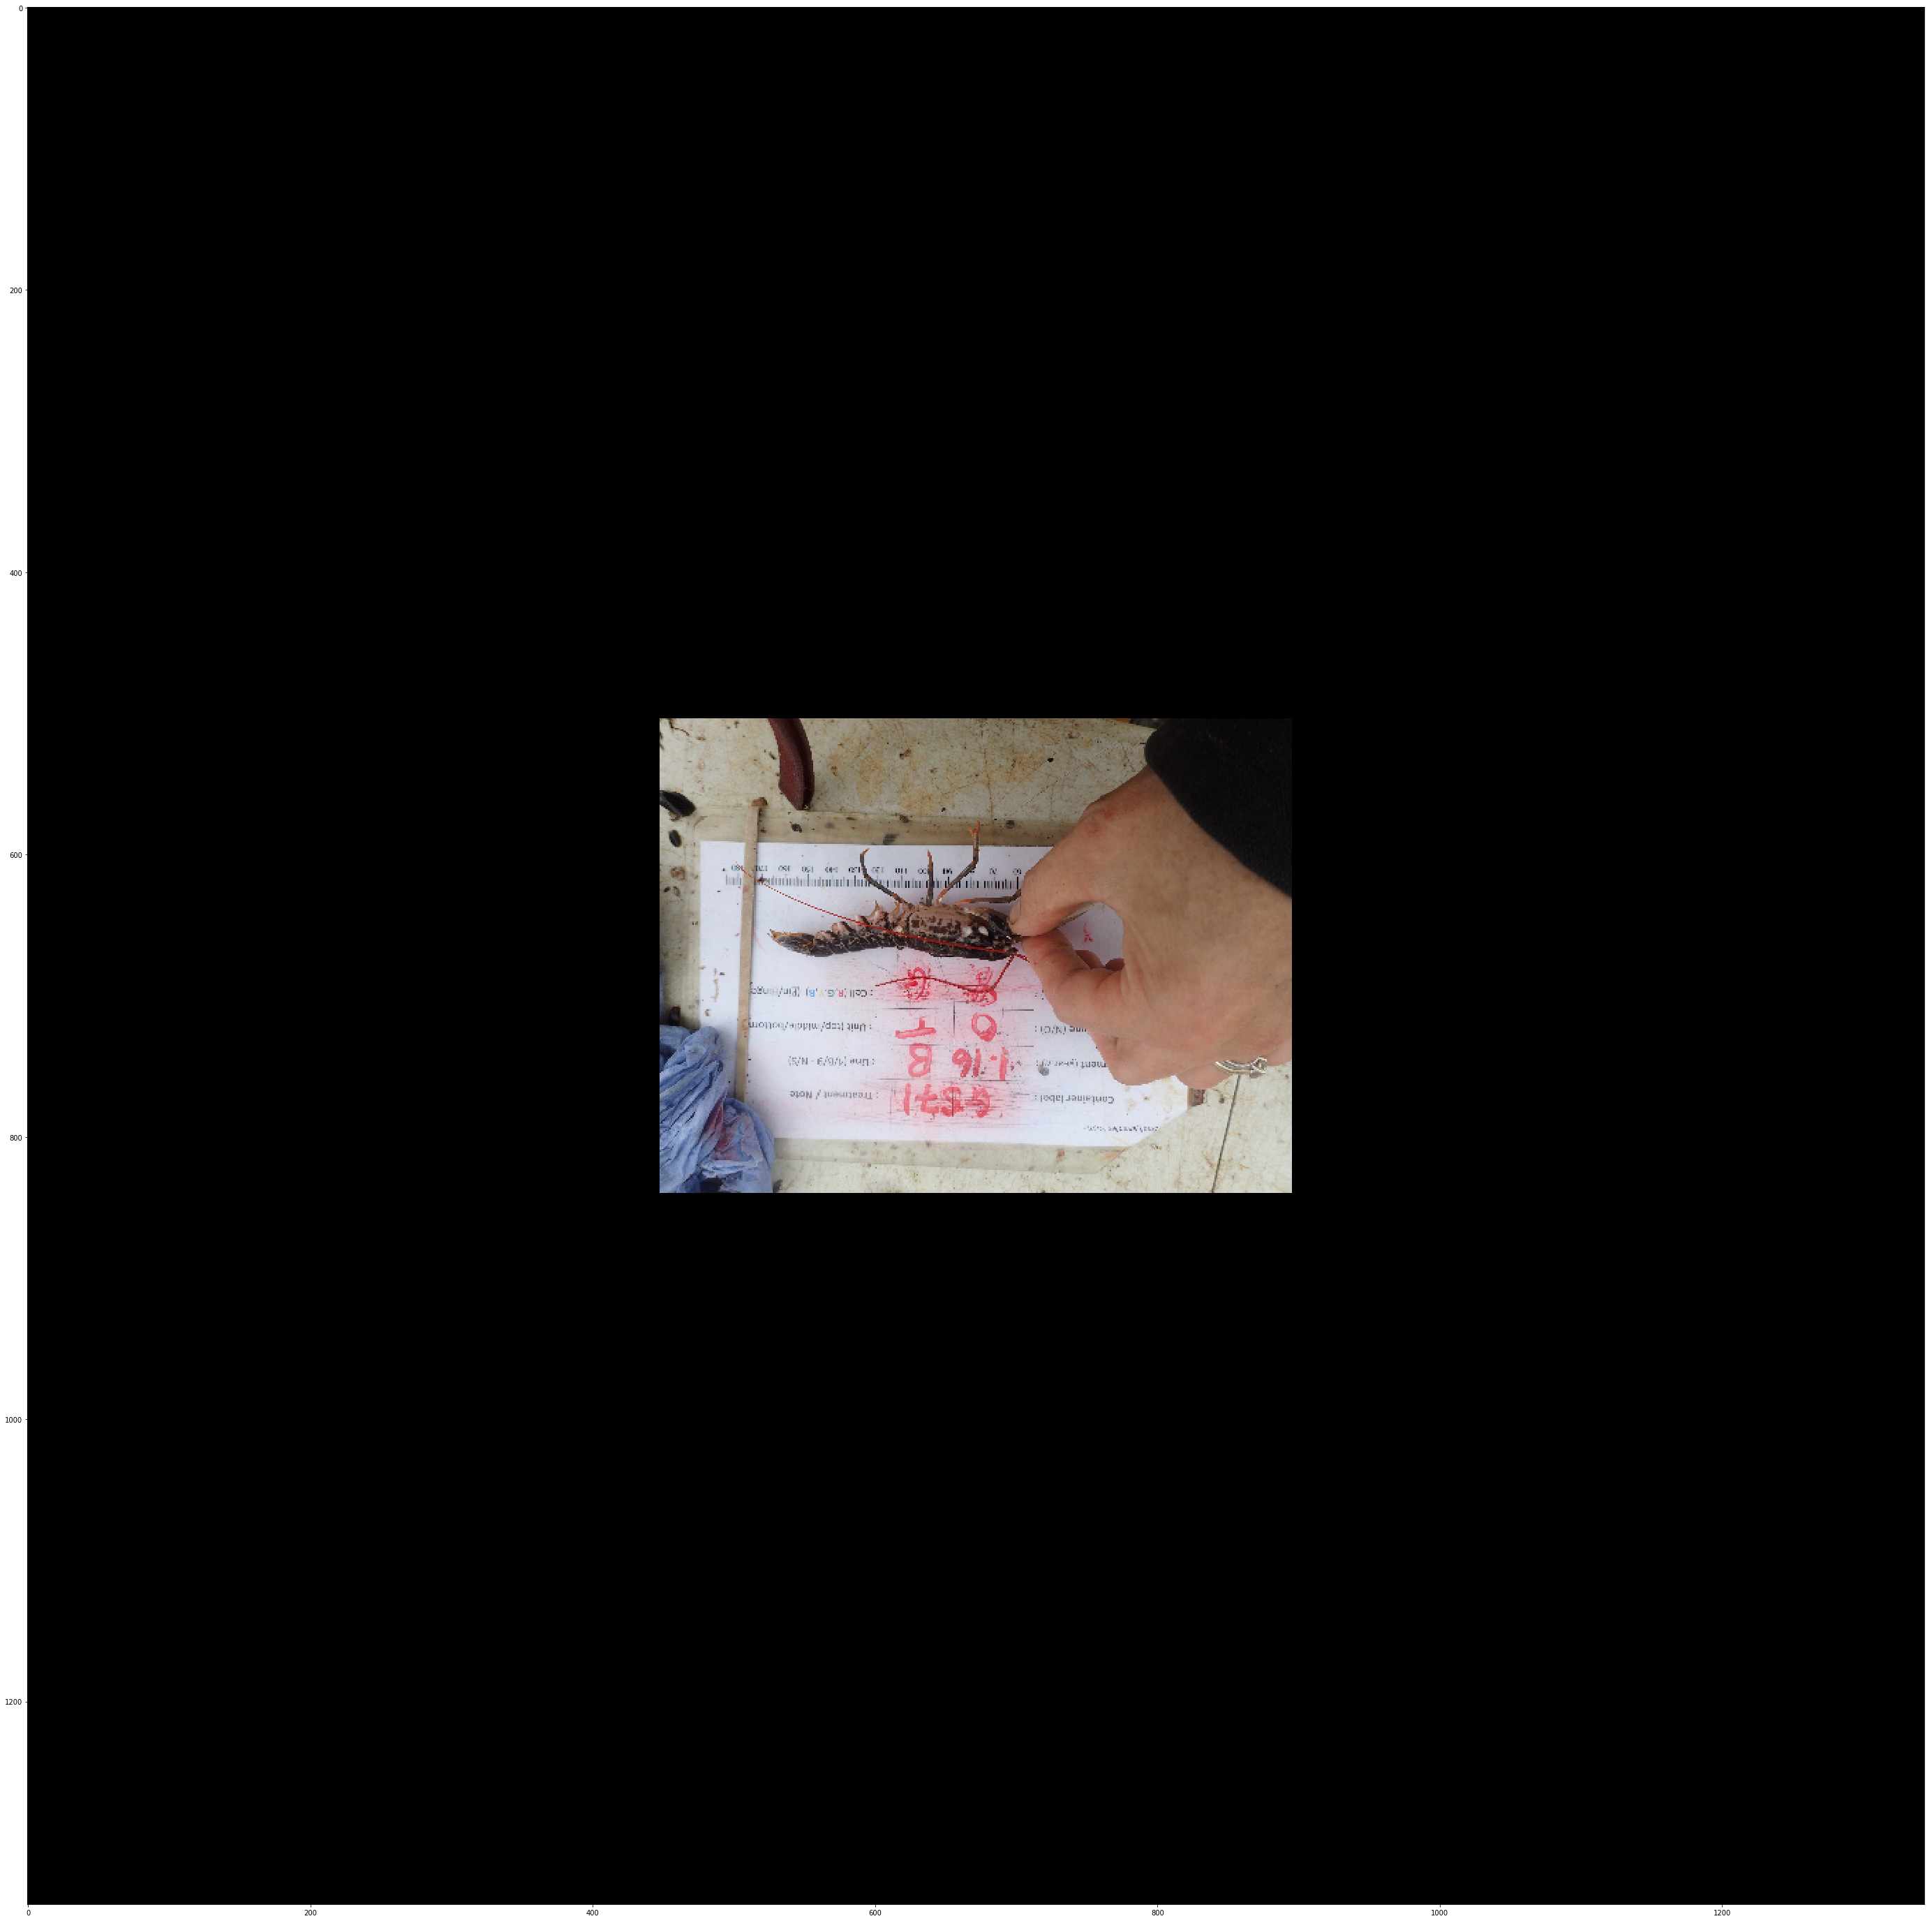

In [287]:
plt.figure(figsize=(50,50))
idx = 615
features = convert_bboxes([all_bboxes[idx]])
from PIL import Image
img = all_images[idx]
color = [0, 0, 0]
maxi = max(img.shape[0],img.shape[1])
new_im = cv2.copyMakeBorder(img, maxi, maxi, maxi, maxi, cv2.BORDER_CONSTANT,
    value=color)
img = Image.fromarray(new_im)
resultIm = img.rotate(math.degrees(-1*features[0][4]),center=(maxi+features[0][2],maxi+features[0][3]),expand=True)
print(features[0][4])
plt.imshow(resultIm)

In [288]:
len(all_bboxes)

909

-3.437746770785044


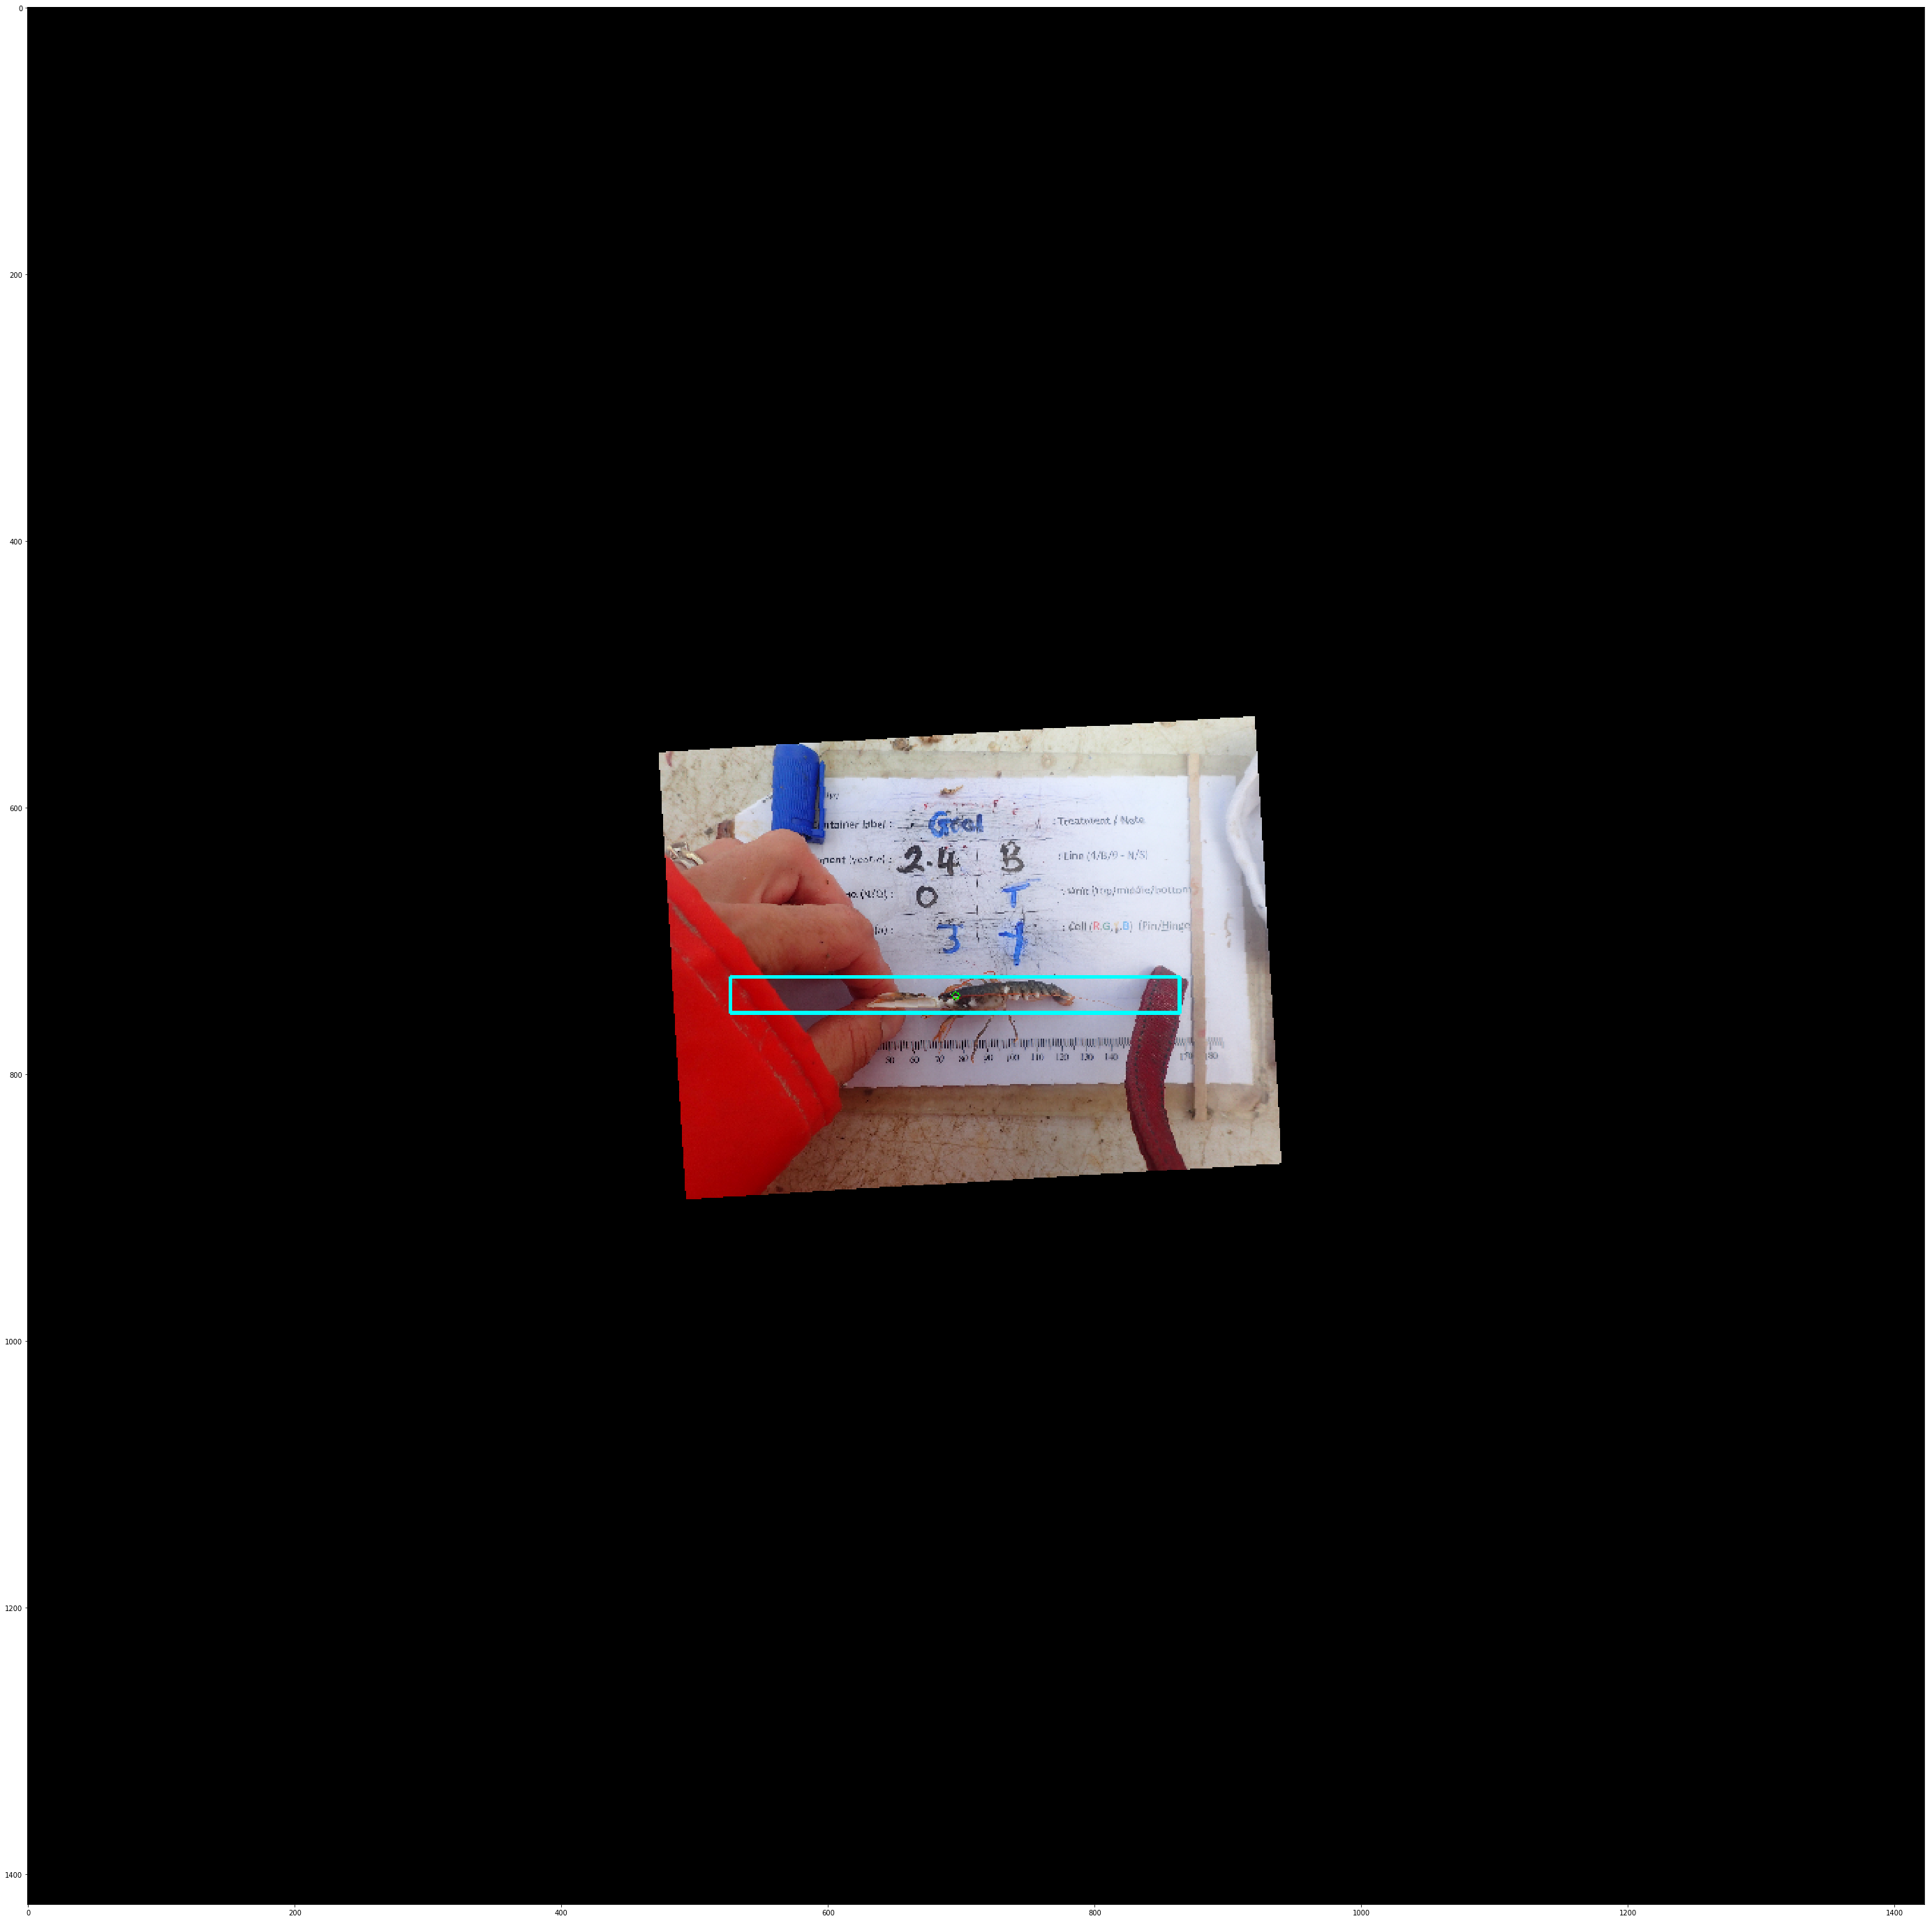

In [289]:
plt.figure(figsize=(50,50))
idx = 7
features = convert_bboxes([test_bboxes[idx]])
from PIL import Image
img = np.array(images)[test][idx]
color = [0, 0, 0]
maxi = max(img.shape[0],img.shape[1])
new_im = cv2.copyMakeBorder(img, maxi, maxi, maxi, maxi, cv2.BORDER_CONSTANT,
    value=color)
img = Image.fromarray(new_im)
resultIm = img.rotate(math.degrees(-1*features[0][4]),center=(maxi+features[0][2],maxi+features[0][3]),expand=True)
print(math.degrees(features[0][4]))
#listx = [int(test_bboxes[idx][0]),int(test_bboxes[idx][2]),int(test_bboxes[idx][4]),int(test_bboxes[idx][6])]
#listy = [int(test_bboxes[idx][1]),int(test_bboxes[idx][3]),int(test_bboxes[idx][5]),int(test_bboxes[idx][7])]
h,w = features[0][0],features[0][1]
startx,endx = int(maxi+features[0][2]-(w/2.0)),int(maxi+features[0][2]+(w/2.0))
starty,endy = int(maxi+features[0][3]-(h/2.0)),int(maxi+features[0][3]+(h/2.0))
#plt.imshow(np.array(resultIm)[startx:endx,starty:endy,:])
img = cv2.rectangle(np.array(resultIm),(startx,starty),(endx,endy),(0,255,255),thickness=2)
img = cv2.circle(img,(int(maxi+features[0][2]),int(maxi+features[0][3])),radius=3,color=(0,255,0))
plt.imshow(img)

In [290]:
startx

527

In [291]:
img.size

6074787

In [292]:
[pts+maxi]

[array([[[892.55695849, 585.70742868]],
 
        [[891.5626874 , 560.86390981]],
 
        [[520.53422762, 575.71296854]],
 
        [[521.52849871, 600.55648741]]])]

<Figure size 2160x2160 with 0 Axes>

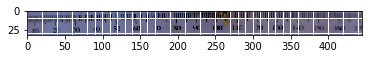

<Figure size 432x288 with 0 Axes>

In [372]:
plt.figure(figsize=(30,30))
idx = 17
point_list = []
#for keypoint in all_bboxes[idx].keypoints:
#    point_list.append([keypoint.x,keypoint.y])

point_list = [[test_bboxes[idx][0],test_bboxes[idx][1]],[test_bboxes[idx][2],test_bboxes[idx][3]],
[test_bboxes[idx][4],test_bboxes[idx][5]],[test_bboxes[idx][6],test_bboxes[idx][7]]]

pts = np.array(point_list)
pts = pts.reshape((-1,1,2))

#img = cv2.polylines(np.array(images)[test][idx],np.int32([pts]),thickness=2,color=(0,255,255),isClosed=True)
new_im = cv2.copyMakeBorder(np.array(images)[test][idx], maxi, maxi, maxi, maxi, cv2.BORDER_CONSTANT,
    value=color)
#img = cv2.polylines(new_im,np.int32([pts+maxi]),thickness=2,color=(0,255,255),isClosed=True)
features = convert_bboxes([test_bboxes[idx]+maxi])
img = Image.fromarray(new_im)
resultIm = img.rotate(math.degrees(-1*features[0][4]),center=(features[0][2],features[0][3]),expand=False)

h,w = features[0][0],features[0][1]
startx,endx = int(features[0][2]-(w/2.0)),int(features[0][2]+(w/2.0))
starty,endy = int(features[0][3]-(h/2.0)),int(features[0][3]+(h/2.0))
#plt.imshow(np.array(resultIm)[startx:endx,starty:endy,:])
img = cv2.rectangle(np.array(resultIm),(startx,starty),(endx,endy),(0,255,255),thickness=2)
#pil_im = Image.fromarray(resultIm)
img=  cv2.circle(img,(int(features[0][2]),int(features[0][3])),radius=3,color=(0,255,0))
lm = np.array(resultIm)[starty:endy,startx:endx,:]
plt.figure(figsize=(6,4.5))
plt.subplots_adjust(top=0.9, bottom=0.1)
#img=np.random.rand(350,350)
dx, dy = 10,10

grid_color = -1
lm[:,::dy] = grid_color
lm[::dx,:] = grid_color

plt.imshow(lm,'gray',vmin=-1,vmax=1)
plt.show()

plt.savefig('cropped_ruler.jpg')

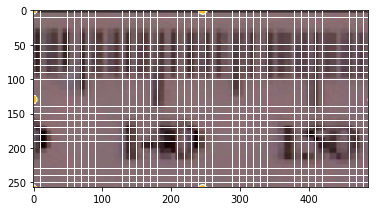

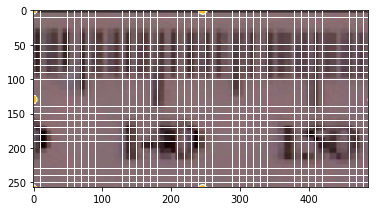

In [373]:
img = cv2.imread("ruler_section.jpg")

# Grid lines at these intervals (in pixels)
# dx and dy can be different
dx, dy = 100,100

# Custom (rgb) grid color
grid_color = [0,0,0]

# # Modify the image to include the grid
# #img[:,::dy,:] = grid_color
# #img[::dx,:,:] = grid_color
# for i in range(img.shape[0]):
#     for j in range(img.shape[1]):
#         if i%dx==0 or j%dy==0:
#             print(i,j)
#             img[i,j,:] = grid_color

dx, dy = 10,10

grid_color = -1
img[:,::dy] = grid_color
img[::dx,:] = grid_color

plt.imshow(img,'gray',vmin=-1,vmax=1)
plt.show()



# Show the result
plt.imshow(img)
plt.show()

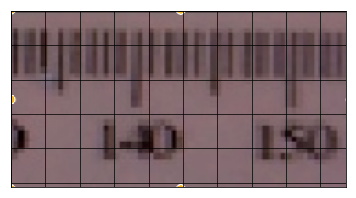

In [386]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker

plt.figure(figsize=(6,3.2))
plt.subplots_adjust(top=0.9, bottom=0.1)
img=cv2.imread("ruler_section.jpg")

plt.imshow(img,'gray',vmin=-1,vmax=1)

plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(50))
plt.gca().yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(50))
plt.grid(which="both", linewidth=0.72,color="k")
plt.tick_params(which="minor", length=0)
plt.xticks([])
plt.yticks([])
plt.savefig('ruler_detection_grid.jpg')
plt.show()

In [367]:
200%100

0

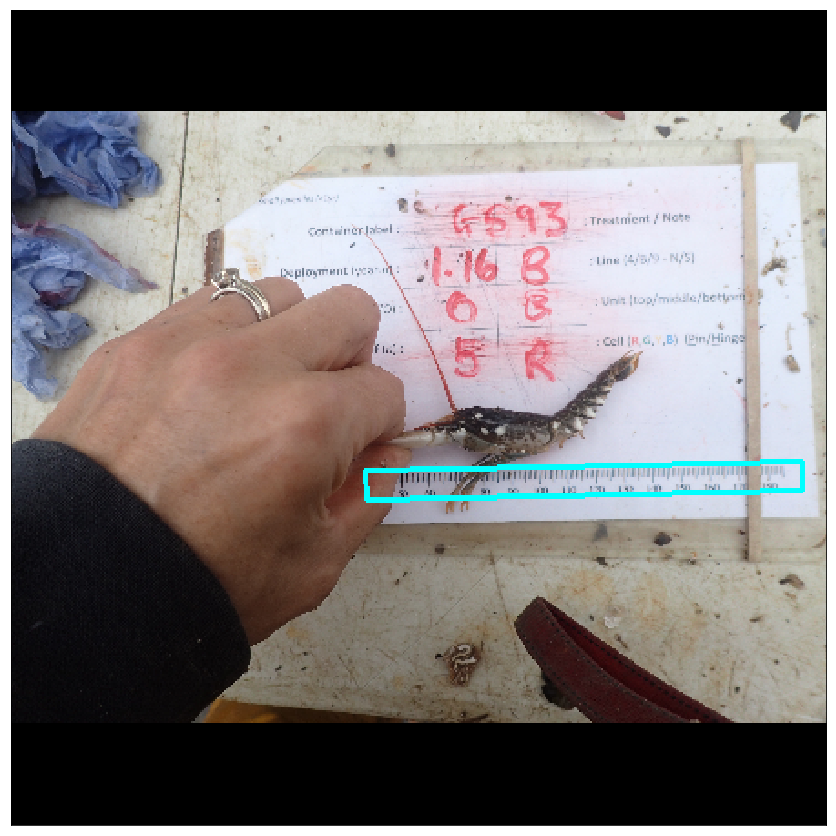

In [345]:
idx = 123
plt.figure(figsize=(15,15))
point_list = [[all_bboxes[idx][0],all_bboxes[idx][1]],[all_bboxes[idx][2],all_bboxes[idx][3]],
[all_bboxes[idx][4],all_bboxes[idx][5]],[all_bboxes[idx][6],all_bboxes[idx][7]]]

pts = np.array(point_list)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(all_images[idx],np.int32([pts]),thickness=2,color=(0,255,255),isClosed=True)
pil_im = Image.fromarray(all_images[idx])
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])
plt.savefig('ruler_detections_rotated_original_box.jpg')

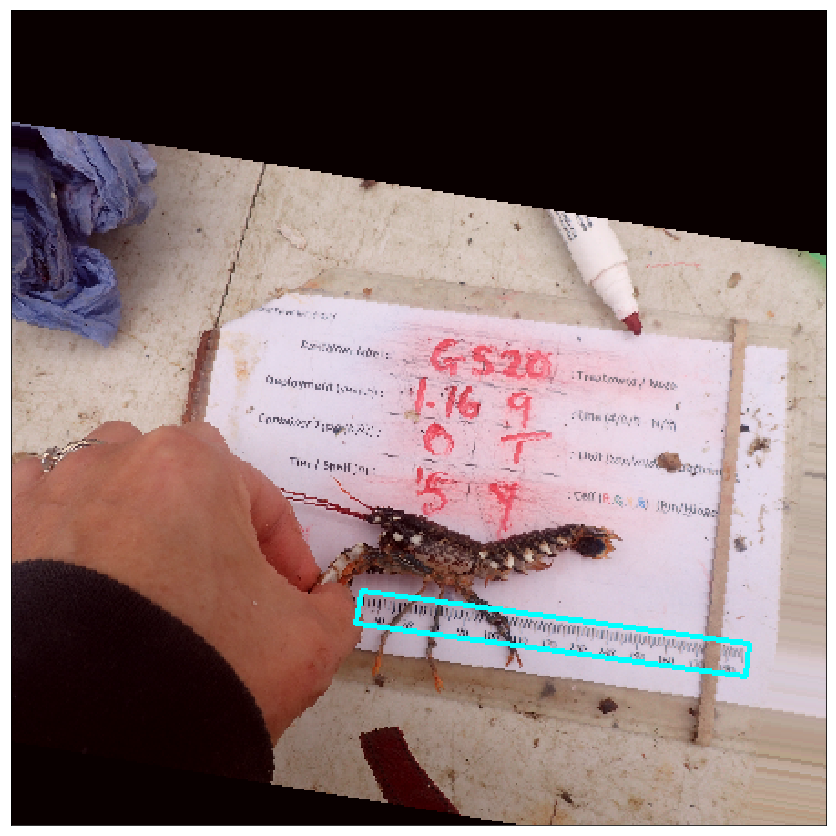

In [330]:
idx = 501
plt.figure(figsize=(15,15))
point_list = [[all_bboxes[idx][0],all_bboxes[idx][1]],[all_bboxes[idx][2],all_bboxes[idx][3]],
[all_bboxes[idx][4],all_bboxes[idx][5]],[all_bboxes[idx][6],all_bboxes[idx][7]]]

pts = np.array(point_list)
pts = pts.reshape((-1,1,2))
#img = cv2.polylines(all_images[idx],np.int32([pts]),thickness=2,color=(0,255,255),isClosed=True)
pil_im = Image.fromarray(img)
plt.imshow(pil_im)
plt.xticks([])
plt.yticks([])
plt.savefig('ruler_detections_rotated_original.jpg')

In [26]:
all_bboxes[700]

array([  5.15196424,  50.98239213,   5.81103204,  29.02005667,
       218.72907187,  35.40951481, 218.07000407,  57.37185028])

In [256]:
bbs.keypoints[0]

Keypoint(x=187.75761159, y=208.26463522)